# Preliminaries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras as ks
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/MyDrive/Data_XY.csv'
data = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
x = data.iloc[:,:4186].values
y = data['y'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)

(525, 4186)


In [ ]:
n_epoch=20
btch_size = 100
lr = .1

In [ ]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(10, activation=ks.activations.tanh, input_dim =  4186)  )
model.add(ks.layers.Dense(10, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(10, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(10, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(10, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(10, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(10, activation=ks.activations.tanh)  )
model.add(ks.layers.Dense(1, activation=ks.activations.linear)  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                41870     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1

In [ ]:
model.compile( loss='mean_squared_error' , 
              optimizer='adam',metrics='mse')

In [ ]:
history = model.fit(x_train, y_train, epochs=70, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/70
9/9 [==============================] - 1s 24ms/step - loss: 13.7100 - mse: 13.7100 - val_loss: 11.2785 - val_mse: 11.2785
Epoch 2/70
9/9 [==============================] - 0s 7ms/step - loss: 9.4282 - mse: 9.4282 - val_loss: 8.2837 - val_mse: 8.2837
Epoch 3/70
9/9 [==============================] - 0s 6ms/step - loss: 7.1403 - mse: 7.1403 - val_loss: 6.5228 - val_mse: 6.5228
Epoch 4/70
9/9 [==============================] - 0s 7ms/step - loss: 5.7847 - mse: 5.7847 - val_loss: 5.4774 - val_mse: 5.4774
Epoch 5/70
9/9 [==============================] - 0s 6ms/step - loss: 4.9806 - mse: 4.9806 - val_loss: 4.8045 - val_mse: 4.8045
Epoch 6/70
9/9 [==============================] - 0s 7ms/step - loss: 4.4937 - mse: 4.4937 - val_loss: 4.2790 - val_mse: 4.2790
Epoch 7/70
9/9 [==============================] - 0s 6ms/step - loss: 3.9175 - mse: 3.9175 - val_loss: 3.2342 - val_mse: 3.2342
Epoch 8/70
9/9 [==============================] - 0s 6ms/step - loss: 3.1755 - mse: 3.1755 - val_lo

In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

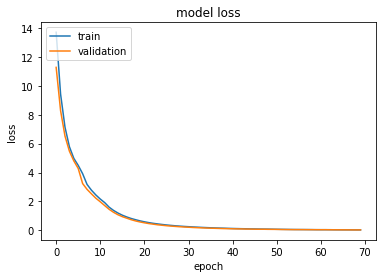

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'y')

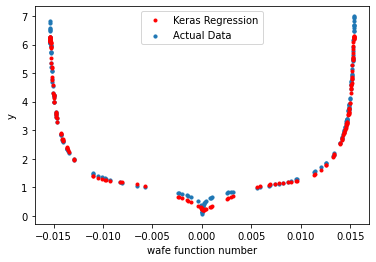

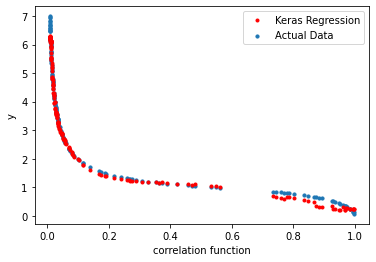

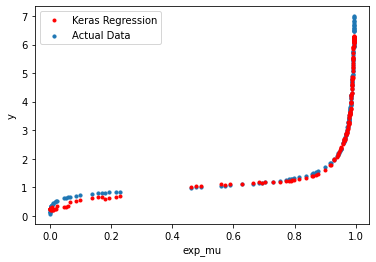

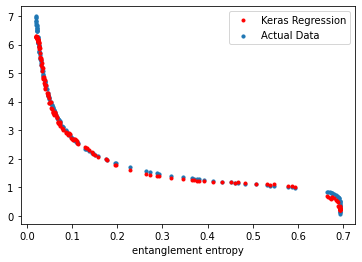

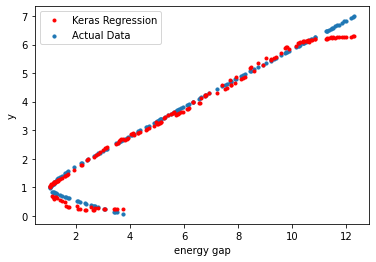

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,300],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,300],y_pred,'.', label="Keras Regression",c='r')
plt.legend()
plt.xlabel('wafe function number')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,20],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,20],y_pred,'.', label="Keras Regression",c = 'r')
plt.legend()
plt.xlabel('correlation function')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,70],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,70],y_pred,'.', label="Keras Regression", c = 'r')
plt.legend()
plt.xlabel('exp_mu')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,88],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,88],y_pred,'.', label="Keras Regression", c = 'r')
plt.legend()
plt.xlabel('entanglement entropy')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,78],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,78],y_pred,'.', label="Keras Regression", c = 'r')
plt.legend()
plt.xlabel('energy gap')
plt.ylabel('y')

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 71kB 5.4MB/s 


In [ ]:
def model_builder(hp):
  model = ks.Sequential()
  model.add(ks.layers.Dense(10, activation=ks.activations.tanh, input_dim =  4186)  )

  hp_units = hp.Int('units', min_value=10, max_value=250, step=10)
  model.add(ks.layers.Dense(units=hp_units, 
                               activation=ks.activations.tanh, 
                               kernel_regularizer=ks.regularizers.l2(.05)))
  model.add(ks.layers.Dense(1, activation=ks.activations.linear ))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=ks.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=ks.losses.mean_squared_error,
                metrics=['mse'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=70,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(x_train, y_train, 
             epochs=70, 
             batch_size = 50, 
             validation_split=0.2,
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 90 Complete [00h 00m 05s]
val_loss: 0.25792360305786133

Best val_loss So Far: 0.029684215784072876
Total elapsed time: 00h 02m 43s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 200 and the optimal learning rate for the optimizer
is 0.01.



In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, 
                    epochs=70, 
                    batch_size = 50, 
                    validation_data=(x_test, y_test))

val_acc_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/70
11/11 [==============================] - 1s 18ms/step - loss: 6.9006 - mse: 5.9704 - val_loss: 3.3192 - val_mse: 2.4600
Epoch 2/70
11/11 [==============================] - 0s 6ms/step - loss: 1.7297 - mse: 0.9539 - val_loss: 1.2691 - val_mse: 0.6006
Epoch 3/70
11/11 [==============================] - 0s 6ms/step - loss: 1.0121 - mse: 0.3971 - val_loss: 0.7281 - val_mse: 0.1895
Epoch 4/70
11/11 [==============================] - 0s 6ms/step - loss: 0.6745 - mse: 0.1969 - val_loss: 0.5809 - val_mse: 0.1676
Epoch 5/70
11/11 [==============================] - 0s 5ms/step - loss: 0.5217 - mse: 0.1520 - val_loss: 0.4370 - val_mse: 0.1182
Epoch 6/70
11/11 [==============================] - 0s 6ms/step - loss: 0.3799 - mse: 0.0952 - val_loss: 0.3049 - val_mse: 0.0541
Epoch 7/70
11/11 [==============================] - 0s 7ms/step - loss: 0.2780 - mse: 0.0514 - val_loss: 0.2404 - val_mse: 0.0408
Epoch 8/70
11/11 [==============================] - 0s 7ms/step - loss: 0.2143 - mse: 0.0

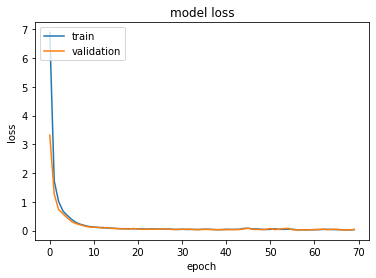

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'y')

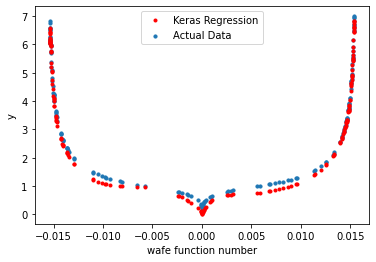

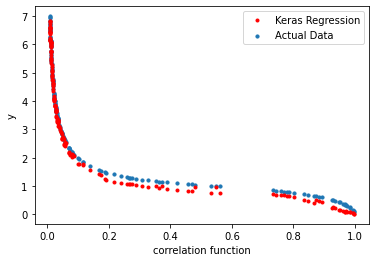

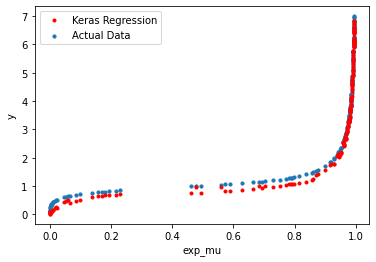

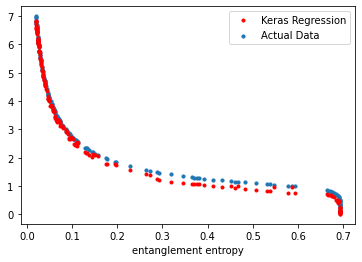

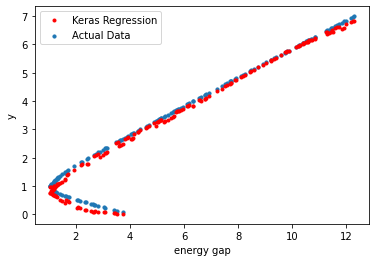

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,300],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,300],y_pred,'.', label="Keras Regression",c='r')
plt.legend()
plt.xlabel('wafe function number')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,20],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,20],y_pred,'.', label="Keras Regression",c = 'r')
plt.legend()
plt.xlabel('correlation function')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,70],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,70],y_pred,'.', label="Keras Regression", c = 'r')
plt.legend()
plt.xlabel('exp_mu')
plt.ylabel('y')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,88],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,88],y_pred,'.', label="Keras Regression", c = 'r')
plt.legend()
plt.xlabel('entanglement entropy')
plt.figure(figsize=(6, 4))
plt.scatter(x_test[:,78],y_test,label="Actual Data",s=10)
plt.plot(x_test[:,78],y_pred,'.', label="Keras Regression", c = 'r')
plt.legend()
plt.xlabel('energy gap')
plt.ylabel('y')